In [1]:
pip install scikit-fuzzy

     |████████████████████████████████| 1.0MB 2.8MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-cp36-none-any.whl size=894070 sha256=f18e370ad013a9c466ebd876a38c48b9a6fbbc6ad4a29c45f66f70f7dab34937
  Stored in directory: /root/.cache/pip/wheels/b9/4e/77/da79b16f64ef1738d95486e2731eea09d73e90a72465096600
Successfully built scikit-fuzzy


In [0]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import random
import skfuzzy as fuzz
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [5]:
data=pd.read_csv('drive/My Drive/Train_2 (1).csv')
data.drop(28,inplace=True)
data.dropna()
data.head()

,sub,C216,C217,C220,C231,C232,C235,C71,C72,C75,C181,C182,C185,C176,C177,C180,C221,C222,C225,C1,C2,C5,C11,C12,C15,C26,C27,C30,C126,C127,C130,C121,C122,C125,C116,C117,C120,C131,C132,C135,C311,C312,C315,C226,C227,C230,mdd
0,507,21.674349,14.099930,2.387568,44.917996,20.497371,1.111564,21.224090,23.448598,4.085677,7.614665,3.899177,0.535605,13.702361,7.348501,0.939868,19.266362,10.247246,1.387171,31.129865,14.856173,1.770791,28.216233,17.051383,2.585762,20.902559,18.025621,4.130615,11.823744,7.304488,1.298215,16.995721,12.819060,2.281814,21.624748,23.685828,5.642496,5.995797,3.464681,0.599201,25.622134,11.918144,1.284748,16.346227,7.715899,0.851480,0
1,508,58.068525,18.397063,0.515605,42.435819,12.108781,0.252235,48.437891,17.498665,2.115653,22.454499,7.162736,0.209119,25.317887,9.807490,0.516798,47.699973,15.648695,0.367685,48.577287,18.493233,0.972074,49.689822,19.895407,1.037797,44.256215,15.754581,1.907673,26.451819,10.184264,0.446735,33.838628,13.252711,1.052100,47.251542,16.815915,0.917157,14.385056,5.481030,0.224213,92.619206,26.513860,0.795009,46.407350,14.356040,0.308012,0
2,509,49.665371,16.829342,0.910013,30.883060,10.356336,0.343335,28.169735,11.745491,1.347537,17.459463,6.725473,0.232844,22.984866,8.880873,0.323530,40.281998,13.536411,0.558472,26.061153,23.225411,4.038577,23.939216,12.917679,2.392762,27.130611,12.791142,1.426820,16.740916,6.957773,0.389087,24.495512,9.515822,0.656791,31.782174,13.558822,1.647254,9.255708,4.120874,0.218449,60.465755,19.029402,0.916170,30.946718,10.375987,0.344302,0
3,510,32.944695,14.003298,0.988404,21.210932,8.198738,0.371886,44.883727,16.243897,0.898270,17.301618,5.836639,0.245023,26.254576,8.636219,0.345388,31.252036,12.055650,0.678953,26.506082,13.180509,1.083436,26.746937,13.629236,1.118375,25.342135,11.108114,1.018578,23.383042,7.849772,0.370745,26.764916,9.715534,0.623609,28.112876,14.371948,1.783017,12.964635,4.498048,0.214863,35.986873,15.851479,1.134914,27.899324,10.464522,0.506227,0
4,511,27.536333,11.534927,0.654818,15.360508,6.510325,0.309164,23.325441,12.823170,1.558925,9.086327,4.868587,0.308925,13.881422,7.106423,0.457533,22.108835,9.562333,0.470252,29.305121,14.182968,1.060786,27.143787,12.893979,0.818188,26.950727,14.520981,1.161594,13.162992,7.320938,0.472170,18.680493,9.787225,0.926854,23.570377,14.194071,2.356958,7.730372,4.721259,0.246923,42.983522,14.013467,0.629870,18.300251,7.895698,0.352694,0


In [6]:
rules=[]
from itertools import product
for roll in product([1, 2, 3], repeat = 12):
    rules.append(roll)
print(len(rules))
print(rules[1])

531441
(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2)


In [0]:
col_names=list(data.columns)
temp=pd.DataFrame()
for i in range(1,47):
    minimum=min(data[col_names[i]])
    maximum=max(data[col_names[i]])
    temp[col_names[i]]=((data[col_names[i]]-minimum)/(maximum-minimum))


In [9]:
X=temp.iloc[:,0:12]

X.shape


(118, 12)

In [0]:
y=np.array(temp.iloc[:,45])

In [0]:
for i in range(X.shape[0]):
  for j in range(X.shape[1]):
    if X.iloc[i,j]<0.15:
      X.iloc[i,j]=int(1)
    elif X.iloc[i,j]>=0.15 and X.iloc[i,j]<0.30:
      X.iloc[i,j]=2
    else:
      X.iloc[i,j]=3

In [0]:
X=X.astype('int')


In [0]:
X=np.array(X)

In [0]:
rules_up=[]
for i in rules:
  # print(i)
  for j in X:
    # print(j)
    if np.array_equal(i,j):
      
      rules_up.append(i)

In [15]:
print(len(rules_up))

118


In [0]:
from skfuzzy import control as ctrl

In [0]:
dict_r={}
for i in range(1,13):
  dict_r[col_names[i]]=ctrl.Antecedent(np.arange(0, 1, 0.1), col_names[i])
res=ctrl.Consequent(np.arange(0, 1, 0.1), 'result')
for i in range(1,13):
  dict_r[col_names[i]]['BC']=fuzz.trimf(dict_r[col_names[i]].universe,[0,0,0.2])
  dict_r[col_names[i]]['anon']=fuzz.trimf(dict_r[col_names[i]].universe,[0,0.2,0.3])
  dict_r[col_names[i]]['EF']=fuzz.trimf(dict_r[col_names[i]].universe,[0.2,1.0,1.0])
res['poor']=fuzz.trimf(res.universe,[0,0,0.2])
res['average']=fuzz.trimf(res.universe,[0,0.2,0.3])
res['good']=fuzz.trimf(res.universe,[0.2,1,1])

In [0]:
dict_r={}
for i in range(1,13):
  dict_r[col_names[i]]=ctrl.Antecedent(np.arange(0, 1, 0.1), col_names[i])
res=ctrl.Consequent(np.arange(0, 1, 0.1), 'result')
for i in range(1,13):
  dict_r[col_names[i]]['BC']=fuzz.gaussmf(dict_r[col_names[i]].universe,0,0.35)
  dict_r[col_names[i]]['anon']=fuzz.gaussmf(dict_r[col_names[i]].universe,0.25,0.35)
  dict_r[col_names[i]]['EF']=fuzz.gaussmf(dict_r[col_names[i]].universe,0.55,0.35)
res['poor']=fuzz.gaussmf(res.universe,0,0.35)
res['average']=fuzz.gaussmf(res.universe,0.25,0.35)
res['good']=fuzz.gaussmf(res.universe,0.55,0.35)

In [0]:
dict_r={}
for i in range(1,13):
  dict_r[col_names[i]]=ctrl.Antecedent(np.arange(0, 1, 0.1), col_names[i])
res=ctrl.Consequent(np.arange(0, 1, 0.1), 'result')
for i in range(1,13):
  dict_r[col_names[i]]['BC']=fuzz.trapmf(dict_r[col_names[i]].universe,[0,0,0.08,0.2])
  dict_r[col_names[i]]['anon']=fuzz.trapmf(dict_r[col_names[i]].universe,[0,0.1,0.2,0.3])
  dict_r[col_names[i]]['EF']=fuzz.trapmf(dict_r[col_names[i]].universe,[0.3,0.7,0.8,1])
res['poor']=fuzz.trapmf(res.universe,[0,0,0.08,0.2])
res['average']=fuzz.trapmf(res.universe,[0,0.1,0.2,0.3])
res['good']=fuzz.trapmf(res.universe,[0.3,0.7,0.8,1])

In [0]:
dict_r={}
for i in range(1,13):
  dict_r[col_names[i]]=ctrl.Antecedent(np.arange(0, 1, 0.1), col_names[i])
res=ctrl.Consequent(np.arange(0, 1, 0.1), 'result')
for i in range(1,13):
  dict_r[col_names[i]]['BC']=fuzz.sigmf(dict_r[col_names[i]].universe,0,3)
  dict_r[col_names[i]]['anon']=fuzz.sigmf(dict_r[col_names[i]].universe,0.15,5)
  dict_r[col_names[i]]['EF']=fuzz.sigmf(dict_r[col_names[i]].universe,0.3,8)
res['poor']=fuzz.sigmf(res.universe,0,3)
res['average']=fuzz.sigmf(res.universe,0.15,5)
res['good']=fuzz.sigmf(res.universe,0.3,8)

In [0]:
dict_r={}
for i in range(1,13):
  dict_r[col_names[i]]=ctrl.Antecedent(np.arange(0, 1, 0.1), col_names[i])
res=ctrl.Consequent(np.arange(0, 1, 0.1), 'result')
for i in range(1,13):
  dict_r[col_names[i]]['BC']=fuzz.gbellmf(dict_r[col_names[i]].universe,0.1,0,0.2)
  dict_r[col_names[i]]['anon']=fuzz.gbellmf(dict_r[col_names[i]].universe,0.1,0.2,0.3)
  dict_r[col_names[i]]['EF']=fuzz.gbellmf(dict_r[col_names[i]].universe,0.3,1,1)
res['poor']=fuzz.gbellmf(res.universe,0.1,0,0.2)
res['average']=fuzz.gbellmf(res.universe,0.1,0.2,0.3)
res['good']=fuzz.gbellmf(res.universe,0.3,1,1)

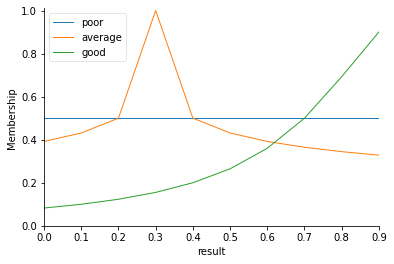

In [148]:
res.view()

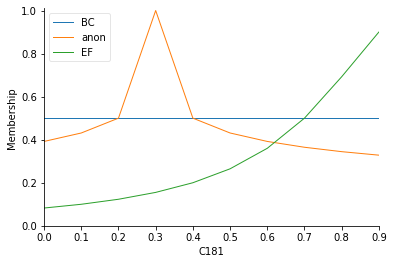

In [149]:
dict_r['C181'].view()

In [0]:
from collections import Counter
import operator
def gen_mem(temp,r):
# rulebase=[]

# for i in range(len(rules_up)):
  r1=[]
  c=Counter(r)
  # print(rules[i])
  for j in range(len(r)):
    if r[j]==1:
      r1.append("BC")
    elif r[j]==2:
      r1.append("anon")
    else:
      r1.append("EF")
  # print(r1)
  a=set((0,1))
  b=set((3,4,5))
  ind1=[i for i, x in enumerate(rules_up[i]) if x ==1]
  ind2=[i for i, x in enumerate(rules_up[i]) if x ==2]
  ind3=[i for i, x in enumerate(rules_up[i]) if x ==3]
  # print( a.issubset(ind1))
  
  if max(c.items(), key=operator.itemgetter(1))[0]==1:
    
    if a.issubset(ind1):
      
      rule=ctrl.Rule(dict_r["C216"][r1[0]] & dict_r["C217"][r1[1]] & dict_r["C220"][r1[2]] & dict_r["C231"][r1[3]] & dict_r["C232"][r1[4]] & dict_r["C235"][r1[5]] & dict_r["C71"][r1[6]] & dict_r["C72"][r1[7]] & dict_r["C75"][r1[8]] & dict_r["C181"][r1[9]] & dict_r["C182"][r1[10]] & dict_r["C185"][r1[11]], consequent=res["poor"])
    elif b.issubset(ind1):
      rule=ctrl.Rule(dict_r["C216"][r1[0]] & dict_r["C217"][r1[1]] & dict_r["C220"][r1[2]] & dict_r["C231"][r1[3]] & dict_r["C232"][r1[4]] & dict_r["C235"][r1[5]] & dict_r["C71"][r1[6]] & dict_r["C72"][r1[7]] & dict_r["C75"][r1[8]] & dict_r["C181"][r1[9]] & dict_r["C182"][r1[10]] & dict_r["C185"][r1[11]], consequent=res["good"])
    else:
      rule=ctrl.Rule(dict_r["C216"][r1[0]] & dict_r["C217"][r1[1]] & dict_r["C220"][r1[2]] & dict_r["C231"][r1[3]] & dict_r["C232"][r1[4]] & dict_r["C235"][r1[5]] & dict_r["C71"][r1[6]] & dict_r["C72"][r1[7]] & dict_r["C75"][r1[8]] & dict_r["C181"][r1[9]] & dict_r["C182"][r1[10]] & dict_r["C185"][r1[11]], consequent=res["good"])
  elif max(c.items(), key=operator.itemgetter(1))[0]==2:
    rule=ctrl.Rule(dict_r["C216"][r1[0]] & dict_r["C217"][r1[1]] & dict_r["C220"][r1[2]] & dict_r["C231"][r1[3]] & dict_r["C232"][r1[4]] & dict_r["C235"][r1[5]] & dict_r["C71"][r1[6]] & dict_r["C72"][r1[7]] & dict_r["C75"][r1[8]] & dict_r["C181"][r1[9]] & dict_r["C182"][r1[10]] & dict_r["C185"][r1[11]], consequent=res["average"])
  else:
    rule=ctrl.Rule(dict_r["C216"][r1[0]] & dict_r["C217"][r1[1]] & dict_r["C220"][r1[2]] & dict_r["C231"][r1[3]] & dict_r["C232"][r1[4]] & dict_r["C235"][r1[5]] & dict_r["C71"][r1[6]] & dict_r["C72"][r1[7]] & dict_r["C75"][r1[8]] & dict_r["C181"][r1[9]] & dict_r["C182"][r1[10]] & dict_r["C185"][r1[11]], consequent=res["good"])
  # rulebase.append(rule)
    #   r.append(rulebase[j])
  t=[]
  result=ctrl.ControlSystem(rule)
  res_simul=ctrl.ControlSystemSimulation(result)
  # for m in range(temp.shape[0]):
  #   if m==28:
  #     continue
  #   for j in range(1,13):
      
  #     res_simul.input[col_names[j]]=temp[m][j-1]
    
  #   try:
  #     res_simul.compute()
  #     x=res_simul.output['result']
  #   except:
  #     x=0
  #   t.append(x)
  # return t
  # 
  # print(temp)
  # print(temp[0])
  for j in range(1,13):
      # print((i,j-1))
      # print(temp[i][j-1])
      res_simul.input[col_names[j]]=temp[j-1]
  try:
    res_simul.compute()
    x=res_simul.output['result']
  except:
    x=0
  return x
    
  

In [0]:
def com_grade(l,rule):
    res=1
    res=res*gen_mem(l,rule)
    return res
    
  

In [0]:
def grade_certainty(X,rules,y):
    certainty_factor=[]
    cons=[]
    for i in range(len(rules)):
        t=[]
        # print(X.shape)
        # t=com_grade(X,rules[i])
        for j in range(X.shape[0]):
            # print(X[j])
            temp=com_grade(X[j],rules[i])
            t.append(temp)
        Bclass0=0
        Bclass1=0
        # print(t)
        for j in range(len(t)):
            if y[j]==0:
                Bclass0+=t[j]
            else:
                Bclass1+=t[j]
        cons_class=max(Bclass0,Bclass1)
        o_class=min(Bclass0,Bclass1)
        if cons_class==0 and o_class==0:
            cf=0
        else:
            cf=(cons_class - o_class)/(cons_class + o_class)
        if cons_class==Bclass0:
            cons.append(0)
        else:
            cons.append(1)
        certainty_factor.append(cf)
    return cons,certainty_factor
        
        

In [0]:
X_train, X_test, y_train, y_test = train_test_split(np.array(temp.iloc[:,0:12]), y, test_size=0.2, random_state=123)


In [0]:
def model(X,y,rules):
    cons,cf=grade_certainty(X,rules,y)
    cons_class=[]
    certainty_factor=[]
    rev_rules=[]
    for i in range(len(cf)):
        if cf[i]!=0:
            certainty_factor.append(cf[i])
            cons_class.append(cons[i])
            rev_rules.append(rules[i])
    return cons_class,certainty_factor,rev_rules
            
    
    

In [0]:
cons_class,certainty_factor,rev_rules=model(X_train,y_train,rules_up)

In [0]:
def predict(X,y,rules,cons_class,certainty_factor):
    output_class=[]
    cf=[]
    r=[]
    for i in range(X.shape[0]):
        m=-1
        o=None
        for j in range(len(rules)):
            com=com_grade(X[i],rules[j])
            if com*certainty_factor[j]>m:
                m=com*certainty_factor[j]
                o=cons_class[j]
                ru=rules[j]
        cf.append(m)
        output_class.append(o)
        r.append(ru)
    return output_class,cf,r
            
            
    

In [0]:
output_class,cf,r=predict(X_test,y_test,rev_rules,cons_class,certainty_factor)

In [159]:
accuracy_score(y_test,output_class)

0.6666666666666666

In [144]:
print(certainty_factor)

[0.23372633050125546, 0.23372633050125546, 0.23372633050125546, 0.23355005727398434, 0.2333891648211274, 0.23370353468371105, 0.23392330803632566, 0.23419323530354946, 0.23419323530354946, 0.23364464222326606, 0.23395227587061815, 0.23382864899743913, 0.23315188828179645, 0.2339038362468837, 0.2338673580600031, 0.2335911203076991, 0.23359685881419462, 0.2317304649862683, 0.23403611915269323, 0.23395424384863883, 0.23396806515205448, 0.23243592163026594, 0.23378484210586267, 0.2339918715070487, 0.23083313889356236, 0.23337674620812643, 0.23380266383029413, 0.23201938958246734, 0.23159043273321026, 0.23396962957184533, 0.23403138888087033, 0.23398468926375202, 0.23383619219519572, 0.2346401653581841, 0.23273057729767746, 0.2320006241206337, 0.2343097014240599, 0.23496796746962798, 0.23662156574080373, 0.23398691973753652, 0.23211376870933131, 0.2321850636150787, 0.23324466849987924, 0.23472016551240618, 0.23588492510430104, 0.23344978165660807, 0.23432751020814158, 0.23313332083582763, 0

In [167]:
print(output_class)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [85]:
print(y_test)

[0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0.]
